## Import & Setup


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_parameters(parameter_str):
    # Extract the main minimizer and its parameters
    minimizer_match = re.match(r"(\w+)\((.*)\)", parameter_str)
    if not minimizer_match:
        return {}

    minimizer_name = minimizer_match.group(1)
    parameters_str = minimizer_match.group(2)

    # Extract individual parameters using regular expressions
    params = {}
    param_pattern = re.compile(r'(\w+)=([^,]+(?:\([^)]*\))?)')
    for match in param_pattern.finditer(parameters_str):
        key = match.group(1).strip()
        value = match.group(2).strip()
        # Check if value should be converted to float, int, or kept as is
        if re.match(r'^-?\d+(\.\d+)?$', value):
            if '.' in value:
                value = float(value)
            else:
                value = int(value)
        elif value.lower() == 'true':
            value = True
        elif value.lower() == 'false':
            value = False
        params[key] = value

    # Include the minimizer name
    params['minimizer_name'] = minimizer_name
    return params

In [5]:
# --- User Configuration: Set path to the desired result file ---

# The user must provide the full path to the 'user_results.csv' file for the analysis they wish to run.
# Uncomment the appropriate line below and edit the placeholder path.
path_to_results = 'YOUR_FILE_PATH_HERE'  # <-- EDIT THIS LINE

In [6]:
results = pd.read_csv(path_to_results)

In [7]:
results.head()

,Unnamed: 0,minimizer_identifier,estimator_identifier,batch_id,per_user_scores,per_user_original_input_interactions,per_user_minimized_input_interactions,per_user_target_interactions,per_user_minimization_ratios,per_user_runtimes,...,NDCGK_100_test_full_input,NDCGK_100_test_min_input,RecallK_20_test_full_input,RecallK_20_test_min_input,RecallK_50_test_full_input,RecallK_50_test_min_input,CalibratedRecallK_20_test_full_input,CalibratedRecallK_20_test_min_input,CalibratedRecallK_50_test_full_input,CalibratedRecallK_50_test_min_input
0,0,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,1.000000,5,5.0,128,1.000000,0.027705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.995342,11,10.0,128,0.909091,0.057211,...,0.705236,0.613147,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
2,2,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.993735,30,28.0,128,0.933333,0.229571,...,0.324499,0.319090,0.142857,0.142857,0.428571,0.428571,0.142857,0.142857,0.428571,0.428571
3,3,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.997977,10,7.0,128,0.700000,0.038526,...,0.120521,0.119539,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000
4,4,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,1.000000,10,10.0,128,1.000000,0.044500,...,0.591235,0.591235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Apply the parse_parameters function to create new columns in the dataframe
parameters_df = results['minimizer_identifier'].apply(parse_parameters)
parameters_df = pd.json_normalize(parameters_df)
results = pd.concat([results, parameters_df], axis=1)

In [9]:
results

,Unnamed: 0,minimizer_identifier,estimator_identifier,batch_id,per_user_scores,per_user_original_input_interactions,per_user_minimized_input_interactions,per_user_target_interactions,per_user_minimization_ratios,per_user_runtimes,...,max_size,metric,model,density,l2,remove_history,timeout,timeout_manager,minimizer_name,beam_depth
0,0,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,1.000000,5,5.0,128,1.000000,0.027705,...,None,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
1,1,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.995342,11,10.0,128,0.909091,0.057211,...,None,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
2,2,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.993735,30,28.0,128,0.933333,0.229571,...,None,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
3,3,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.997977,10,7.0,128,0.700000,0.038526,...,None,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
4,4,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,1.000000,10,10.0,128,1.000000,0.044500,...,None,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,209995,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,268,268.0,128,1.000000,73.491503,...,NaN,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0
209996,209996,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,218,218.0,128,1.000000,42.962872,...,NaN,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0
209997,209997,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,247,247.0,128,1.000000,58.826053,...,NaN,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0
209998,209998,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,258,258.0,128,1.000000,65.678449,...,NaN,NDCG_100,EASE(alpha=0,0.003,1400),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0


In [10]:
results.columns

Index(['Unnamed: 0', 'minimizer_identifier', 'estimator_identifier',
       'batch_id', 'per_user_scores', 'per_user_original_input_interactions',
       'per_user_minimized_input_interactions', 'per_user_target_interactions',
       'per_user_minimization_ratios', 'per_user_runtimes',
       'per_user_sample_counts', 'per_user_performance_threshold',
       'per_user_constraint_satisfaction', 'NDCGK_100_test_full_input',
       'NDCGK_100_test_min_input', 'RecallK_20_test_full_input',
       'RecallK_20_test_min_input', 'RecallK_50_test_full_input',
       'RecallK_50_test_min_input', 'CalibratedRecallK_20_test_full_input',
       'CalibratedRecallK_20_test_min_input',
       'CalibratedRecallK_50_test_full_input',
       'CalibratedRecallK_50_test_min_input', 'eta', 'max_size', 'metric',
       'model', 'density', 'l2', 'remove_history', 'timeout',
       'timeout_manager', 'minimizer_name', 'beam_depth'],
      dtype='object')

### Performance Retention Ratios

In [11]:
# Calculate PRR for each metric, handling division by zero
results['PRR_NDCGK_100'] = np.where(results['NDCGK_100_test_full_input'] != 0,
                                    results['NDCGK_100_test_min_input'] / results['NDCGK_100_test_full_input'],
                                    np.nan)
results['PRR_RecallK_20'] = np.where(results['RecallK_20_test_full_input'] != 0,
                                     results['RecallK_20_test_min_input'] / results['RecallK_20_test_full_input'],
                                     np.nan)
results['PRR_RecallK_50'] = np.where(results['RecallK_50_test_full_input'] != 0,
                                     results['RecallK_50_test_min_input'] / results['RecallK_50_test_full_input'],
                                     np.nan)
results['PRR_CalibratedRecallK_20'] = np.where(results['CalibratedRecallK_20_test_full_input'] != 0,
                                               results['CalibratedRecallK_20_test_min_input'] / results['CalibratedRecallK_20_test_full_input'],
                                               np.nan)
results['PRR_CalibratedRecallK_50'] = np.where(results['CalibratedRecallK_50_test_full_input'] != 0,
                                               results['CalibratedRecallK_50_test_min_input'] / results['CalibratedRecallK_50_test_full_input'],
                                               np.nan)
results['PRR_per_user_scores'] = np.where(results['per_user_performance_threshold'] != 0,
                                          results['per_user_scores'] / results['per_user_performance_threshold'],
                                          np.nan)

In [12]:
# Filter out users with PRR > 2.0 for PRR_NDCGK_100
filtered_results = results[results['PRR_NDCGK_100'] <= 2.0]

In [13]:
filtered_results

,Unnamed: 0,minimizer_identifier,estimator_identifier,batch_id,per_user_scores,per_user_original_input_interactions,per_user_minimized_input_interactions,per_user_target_interactions,per_user_minimization_ratios,per_user_runtimes,...,timeout,timeout_manager,minimizer_name,beam_depth,PRR_NDCGK_100,PRR_RecallK_20,PRR_RecallK_50,PRR_CalibratedRecallK_20,PRR_CalibratedRecallK_50,PRR_per_user_scores
1,1,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.995342,11,10.0,128,0.909091,0.057211,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN,0.869421,1.0,1.0,1.0,1.0,1.005396
2,2,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.993735,30,28.0,128,0.933333,0.229571,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN,0.983331,1.0,1.0,1.0,1.0,1.003772
3,3,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.997977,10,7.0,128,0.700000,0.038526,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN,0.991847,NaN,1.0,NaN,1.0,1.008057
4,4,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,1.000000,10,10.0,128,1.000000,0.044500,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN,1.000000,1.0,1.0,1.0,1.0,1.010101
5,5,"GreedyForwardMinimizer(eta=0.99,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.01)",0,0.992328,33,32.0,128,0.969697,0.258867,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN,0.944769,1.0,1.0,1.0,1.0,1.002351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,209995,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,268,268.0,128,1.000000,73.491503,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0,1.000000,1.0,1.0,1.0,1.0,1.000000
209996,209996,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,218,218.0,128,1.000000,42.962872,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0,1.000000,1.0,1.0,1.0,1.0,1.000000
209997,209997,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,247,247.0,128,1.000000,58.826053,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0,1.000000,1.0,1.0,1.0,1.0,1.000000
209998,209998,"GreedyBeamForwardMinimizer(beam_depth=5,eta=1....","ExponentialDecayEstimator(K=128, gamma=0.01)",4,1.000000,258,258.0,128,1.000000,65.678449,...,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyBeamForwardMinimizer,5.0,1.000000,1.0,1.0,1.0,1.0,1.000000


<Figure size 7200x4800 with 0 Axes>

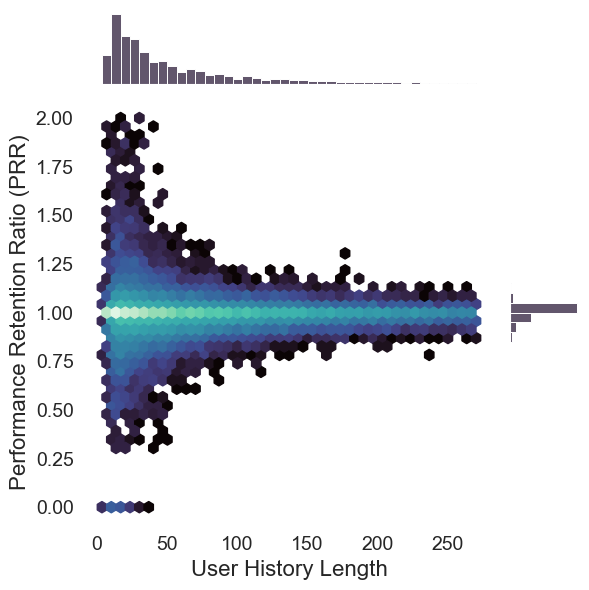

In [14]:
# Plotting
metrics = ['PRR_NDCGK_100', 'PRR_RecallK_20', 'PRR_RecallK_50', 'PRR_CalibratedRecallK_20', 'PRR_CalibratedRecallK_50', 'PRR_per_user_scores']

palette_choice = 'mako'  # Change to 'rocket' if you prefer

metric = 'PRR_NDCGK_100'

# Set the figure size and DPI for high resolution
plt.figure(figsize=(12, 8), dpi=600)

g = sns.jointplot(
    data=filtered_results,
    x='per_user_original_input_interactions',
    y=metric,
    kind="hex",
    marginal_kws=dict(color=sns.color_palette(palette_choice)[0], bins=40, fill=True),  # Use the first color from the palette
    joint_kws=dict(gridsize=40, bins='log', cmap=palette_choice)  # Use the chosen palette
)
g.set_axis_labels('User History Length', f'Performance Retention Ratio (PRR)', fontsize=16)
# Increase font size of tick labels
g.ax_joint.tick_params(axis='both', which='major', labelsize=14)

# Remove grid lines
g.ax_joint.grid(False)

# Set background color to white
g.fig.patch.set_facecolor('white')
g.ax_joint.set_facecolor('white')
g.ax_marg_x.set_facecolor('white')
g.ax_marg_y.set_facecolor('white')
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

g.savefig('high_res_plot.pdf')          # PDF format

### Minimization Ratios

In [28]:
# --- User Configuration: Set path to the desired minimization result file ---

# The user must provide the full path to the 'user_results.csv' file for the analysis they wish to run.
# Uncomment the option you wish to use and provide the correct file path.
path_to_minimization_results = 'YOUR_FILE_PATH_HERE' # <-- EDIT THIS LINE

In [29]:
mr_results = pd.read_csv(path_to_minimization_results)

In [30]:
# Apply the parse_parameters function to create new columns in the dataframe
parameters_df = mr_results['minimizer_identifier'].apply(parse_parameters)
parameters_df = pd.json_normalize(parameters_df)
mr_results = pd.concat([mr_results, parameters_df], axis=1)

In [31]:
mr_results.head()

,Unnamed: 0,minimizer_identifier,estimator_identifier,batch_id,per_user_scores,per_user_original_input_interactions,per_user_minimized_input_interactions,per_user_target_interactions,per_user_minimization_ratios,per_user_runtimes,...,model,normalize_X,normalize_sim,pop_discount,similarity,remove_history,timeout,timeout_manager,minimizer_name,beam_depth
0,0,"GreedyForwardMinimizer(eta=0.98,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.8)",4,0.981668,375,43.0,128,0.114667,4.222637,...,ItemKNN(K=50,True,True,None,cosine),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
1,1,"GreedyForwardMinimizer(eta=0.98,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.8)",4,0.980011,404,82.0,128,0.202970,9.752681,...,ItemKNN(K=50,True,True,None,cosine),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
2,2,"GreedyForwardMinimizer(eta=0.98,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.8)",4,0.981886,422,36.0,128,0.085308,4.067533,...,ItemKNN(K=50,True,True,None,cosine),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
3,3,"GreedyForwardMinimizer(eta=0.98,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.8)",4,0.980646,356,32.0,128,0.089888,2.943287,...,ItemKNN(K=50,True,True,None,cosine),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN
4,4,"GreedyForwardMinimizer(eta=0.98,max_size=None,...","ExponentialDecayEstimator(K=128, gamma=0.8)",4,0.980705,357,56.0,128,0.156863,5.388471,...,ItemKNN(K=50,True,True,None,cosine),True,345600,<minipack.minimizers.base.TimeoutManager objec...,GreedyForwardMinimizer,NaN


In [32]:
mr_results.columns

Index(['Unnamed: 0', 'minimizer_identifier', 'estimator_identifier',
       'batch_id', 'per_user_scores', 'per_user_original_input_interactions',
       'per_user_minimized_input_interactions', 'per_user_target_interactions',
       'per_user_minimization_ratios', 'per_user_runtimes',
       'per_user_sample_counts', 'per_user_performance_threshold',
       'per_user_constraint_satisfaction', 'NDCGK_100_test_full_input',
       'NDCGK_100_test_min_input', 'RecallK_20_test_full_input',
       'RecallK_20_test_min_input', 'RecallK_50_test_full_input',
       'RecallK_50_test_min_input', 'CalibratedRecallK_20_test_full_input',
       'CalibratedRecallK_20_test_min_input',
       'CalibratedRecallK_50_test_full_input',
       'CalibratedRecallK_50_test_min_input', 'eta', 'max_size', 'metric',
       'model', 'normalize_X', 'normalize_sim', 'pop_discount', 'similarity',
       'remove_history', 'timeout', 'timeout_manager', 'minimizer_name',
       'beam_depth'],
      dtype='object')

In [33]:
# Define the conditions
condition1 = mr_results['minimizer_name'] == 'GreedyBackwardMinimizer'
condition2 = mr_results['eta'] == 0.99

# Combine the conditions using the '&' (AND) operator
# Make sure to use parentheses around each condition due to operator precedence
combined_condition = (condition1 & condition2)

# Select the rows where the combined condition is True
mr_results_filtered= mr_results[combined_condition]

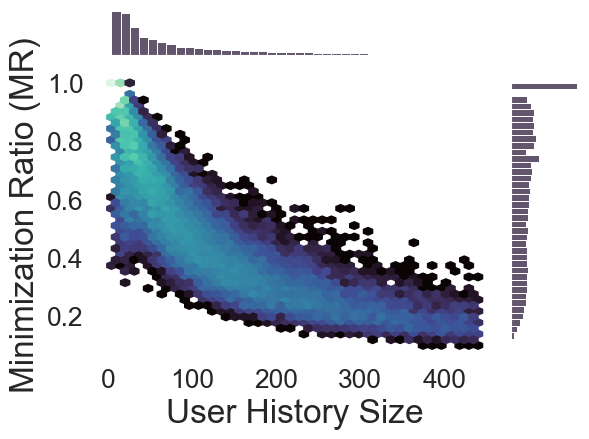

In [35]:
palette_choice = 'mako'
metric = 'per_user_minimization_ratios'

# 1. Create the jointplot (NO plt.figure before this)
g = sns.jointplot(
    data=mr_results_filtered,
    x='per_user_original_input_interactions',
    y=metric,
    kind="hex",
    marginal_kws=dict(color=sns.color_palette(palette_choice)[0], bins=40, fill=True),
    joint_kws=dict(gridsize=40, bins='log', cmap=palette_choice)
)

# 2. Set the desired figure size (width, height) AFTER creating the plot
#    Choose width > height for a rectangular plot longer on x-axis
desired_width_inches = 6
desired_height_inches = 4.5 # Adjust this height to control the aspect ratio
g.fig.set_size_inches(desired_width_inches, desired_height_inches)

# 3. Apply other customizations
g.set_axis_labels('User History Size', f'Minimization Ratio (MR)', fontsize=24)
g.ax_joint.tick_params(axis='both', which='major', labelsize=19)
g.ax_joint.grid(False)

# Set background color
g.fig.patch.set_facecolor('white')
g.ax_joint.set_facecolor('white')
g.ax_marg_x.set_facecolor('white')
g.ax_marg_y.set_facecolor('white')

# 4. Adjust layout AFTER resizing
# plt.subplots_adjust(top=0.9) # Often less needed when using tight_layout correctly
plt.tight_layout() # Adjusts subplot params for a tight layout within the new figure size

# 5. Show the plot
plt.show()

# 6. Save the figure (use the 'g' object's savefig method)
#    Set DPI during saving for high resolution.
g.savefig('high_res_plot.pdf', dpi=600, facecolor='white')